Understand how contrastive embeddings use the dimensions of the embedding space.

In [1]:
cd ../..

/userdata/jgauthier/projects/ideal-word-representations


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch

In [3]:
from IsoScore.IsoScore import IsoScore

In [4]:
embedding_paths = {
    "phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8/phoneme/embeddings.npy",
    "phoneme3": "outputs/model_embeddings/timit/w2v2_6/rnn_3/phoneme/embeddings.npy",
    "next_phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8/next_phoneme/embeddings.npy",
    "biphone_pred": "outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_pred/embeddings.npy",
    "biphone_recon": "outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_recon/embeddings.npy",
    "syllable": "outputs/model_embeddings/timit/w2v2_6/rnn_8/syllable/embeddings.npy",
    "word": "outputs/model_embeddings/timit/w2v2_6/rnn_8/word/embeddings.npy",

    "10frames_phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8/phoneme_10frames/embeddings.npy",

    "random_rnn": "outputs/model_embeddings/timit/w2v2_6/randomrnn_8/random/embeddings.npy",
    "random_ff": "outputs/model_embeddings/timit/w2v2_6/randomff_8/random/embeddings.npy",
}

In [5]:
embeddings = {key: np.load(path) for key, path in embedding_paths.items()}

In [6]:
# from sklearn.decomposition import PCA
# embeddings_decomp = {}
# for key, emb in embeddings.items():
#     pca = PCA(n_components=1)
#     pca.fit(emb)
    
#     # Remove first K principal components from embedding
#     emb = emb - emb @ pca.components_.T @ pca.components_
#     embeddings_decomp[key] = emb

# # # DEV
# # embeddings = embeddings_decomp

## Correlation measure

In [7]:
corrs = []
for key, embedding in embeddings.items():
    corrs_i = np.corrcoef(embedding.T)
    corrs_i = np.abs(corrs_i[np.triu_indices(corrs_i.shape[0], k=1)])

    for corrs_ij in corrs_i:
        corrs.append((key, corrs_ij))

/tmp/ipykernel_622438/4156429887.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'phoneme'),
 Text(1, 0, 'phoneme3'),
 Text(2, 0, 'next_phoneme'),
 Text(3, 0, 'biphone_pred'),
 Text(4, 0, 'biphone_recon'),
 Text(5, 0, 'syllable'),
 Text(6, 0, 'word'),
 Text(7, 0, '10frames_phoneme'),
 Text(8, 0, 'random_rnn'),
 Text(9, 0, 'random_ff')]

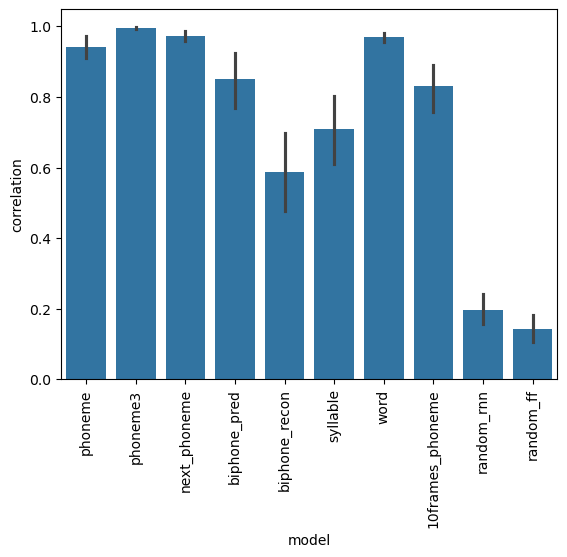

In [9]:
ax = sns.barplot(data=pd.DataFrame(corrs, columns=["model", "correlation"]), x="model", y="correlation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## IsoScore

In [89]:
isoscores = pd.Series({key: IsoScore(embeddings[key]).item() for key in embeddings})
isoscores

phoneme          0.000868
phoneme3         0.001282
next_phoneme     0.001456
biphone_pred     0.005771
biphone_recon    0.082468
syllable         0.030212
word             0.002826
random_rnn       0.661004
random_ff        0.740037
dtype: float64

<Axes: >

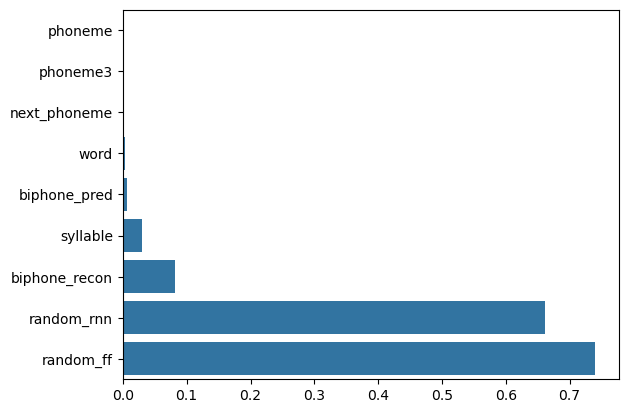

In [91]:
sns.barplot(isoscores, order=isoscores.sort_values().index, orient="h")